In [173]:
import numpy as np
import pandas as pd

import seaborn as sns

import ucimlrepo as uciml

from collections import Counter

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, train_test_split

pd.set_option('display.max_columns', None)


In [28]:
uciml.list_available_datasets()

-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Annealing                                                                               3     
Audiology (Standardized)                                                                8     
Auto MPG                                                                                9     
Automobile                                                                              10    
Balance Scale                                                                           12    
Balloons                       

In [30]:
wine = uciml.fetch_ucirepo(id=109)
print(type(wine))
print(wine.keys())



<class 'ucimlrepo.dotdict.dotdict'>
dict_keys(['data', 'metadata', 'variables'])


In [31]:
wine['metadata']

{'uci_id': 109,
 'name': 'Wine',
 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine',
 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv',
 'abstract': 'Using chemical analysis to determine the origin of wines',
 'area': 'Physics and Chemistry',
 'tasks': ['Classification'],
 'characteristics': ['Tabular'],
 'num_instances': 178,
 'num_features': 13,
 'feature_types': ['Integer', 'Real'],
 'demographics': [],
 'target_col': ['class'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 1992,
 'last_updated': 'Mon Aug 28 2023',
 'dataset_doi': '10.24432/C5PC7J',
 'creators': ['Stefan Aeberhard', 'M. Forina'],
 'intro_paper': {'ID': 246,
  'type': 'NATIVE',
  'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings',
  'authors': 'S. Aeberhard, D. Coomans, O. Vel',
  'venue': 'Pattern Recognition',
  'year': 1994,
  'journal': None,
  'DOI': '10.1016/003

In [35]:
print(type(wine['variables']))
wine['variables']

<class 'pandas.core.frame.DataFrame'>


name     role         type demographic  \
0                          class   Target  Categorical        None   
1                        Alcohol  Feature   Continuous        None   
2                      Malicacid  Feature   Continuous        None   
3                            Ash  Feature   Continuous        None   
4              Alcalinity_of_ash  Feature   Continuous        None   
5                      Magnesium  Feature      Integer        None   
6                  Total_phenols  Feature   Continuous        None   
7                     Flavanoids  Feature   Continuous        None   
8           Nonflavanoid_phenols  Feature   Continuous        None   
9                Proanthocyanins  Feature   Continuous        None   
10               Color_intensity  Feature   Continuous        None   
11                           Hue  Feature   Continuous        None   
12  0D280_0D315_of_diluted_wines  Feature   Continuous        None   
13                       Proline  Feature      Integer        None   

   description units missing_values  
0         None  None             no  
1         None  None             no  
2         None  None             no  
3         None  None             no  
4         None  None             no  
5         None  None             no  
6         None  None             no  
7         None  None             no  
8         None  None             no  
9         None  None             no  
10        None  None             no  
11        None  None             no  
12        None  None             no  
13        None  None             no

In [54]:
print(type(wine['data']))
print(wine['data'].keys())

original = wine['data']['original']
X = wine['data']['features']
y = wine['data']['targets']

display(original)




<class 'ucimlrepo.dotdict.dotdict'>
dict_keys(['ids', 'features', 'targets', 'original', 'headers'])


Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0      14.23       1.71  2.43               15.6        127           2.80   
1      13.20       1.78  2.14               11.2        100           2.65   
2      13.16       2.36  2.67               18.6        101           2.80   
3      14.37       1.95  2.50               16.8        113           3.85   
4      13.24       2.59  2.87               21.0        118           2.80   
..       ...        ...   ...                ...        ...            ...   
173    13.71       5.65  2.45               20.5         95           1.68   
174    13.40       3.91  2.48               23.0        102           1.80   
175    13.27       4.28  2.26               20.0        120           1.59   
176    13.17       2.59  2.37               20.0        120           1.65   
177    14.13       4.10  2.74               24.5         96           2.05   

     Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     0D280_0D315_of_diluted_wines  Proline  class  
0                            3.92     1065      1  
1                            3.40     1050      1  
2                            3.17     1185      1  
3                            3.45     1480      1  
4                            2.93      735      1  
..                            ...      ...    ...  
173                          1.74      740      3  
174                          1.56      750      3  
175                          1.56      835      3  
176                          1.62      840      3  
177                          1.60      560      3  

[178 rows x 14 columns]

In [65]:
# Count the number of classes
y.value_counts(sort=False)



class
1        59
2        71
3        48
Name: count, dtype: int64

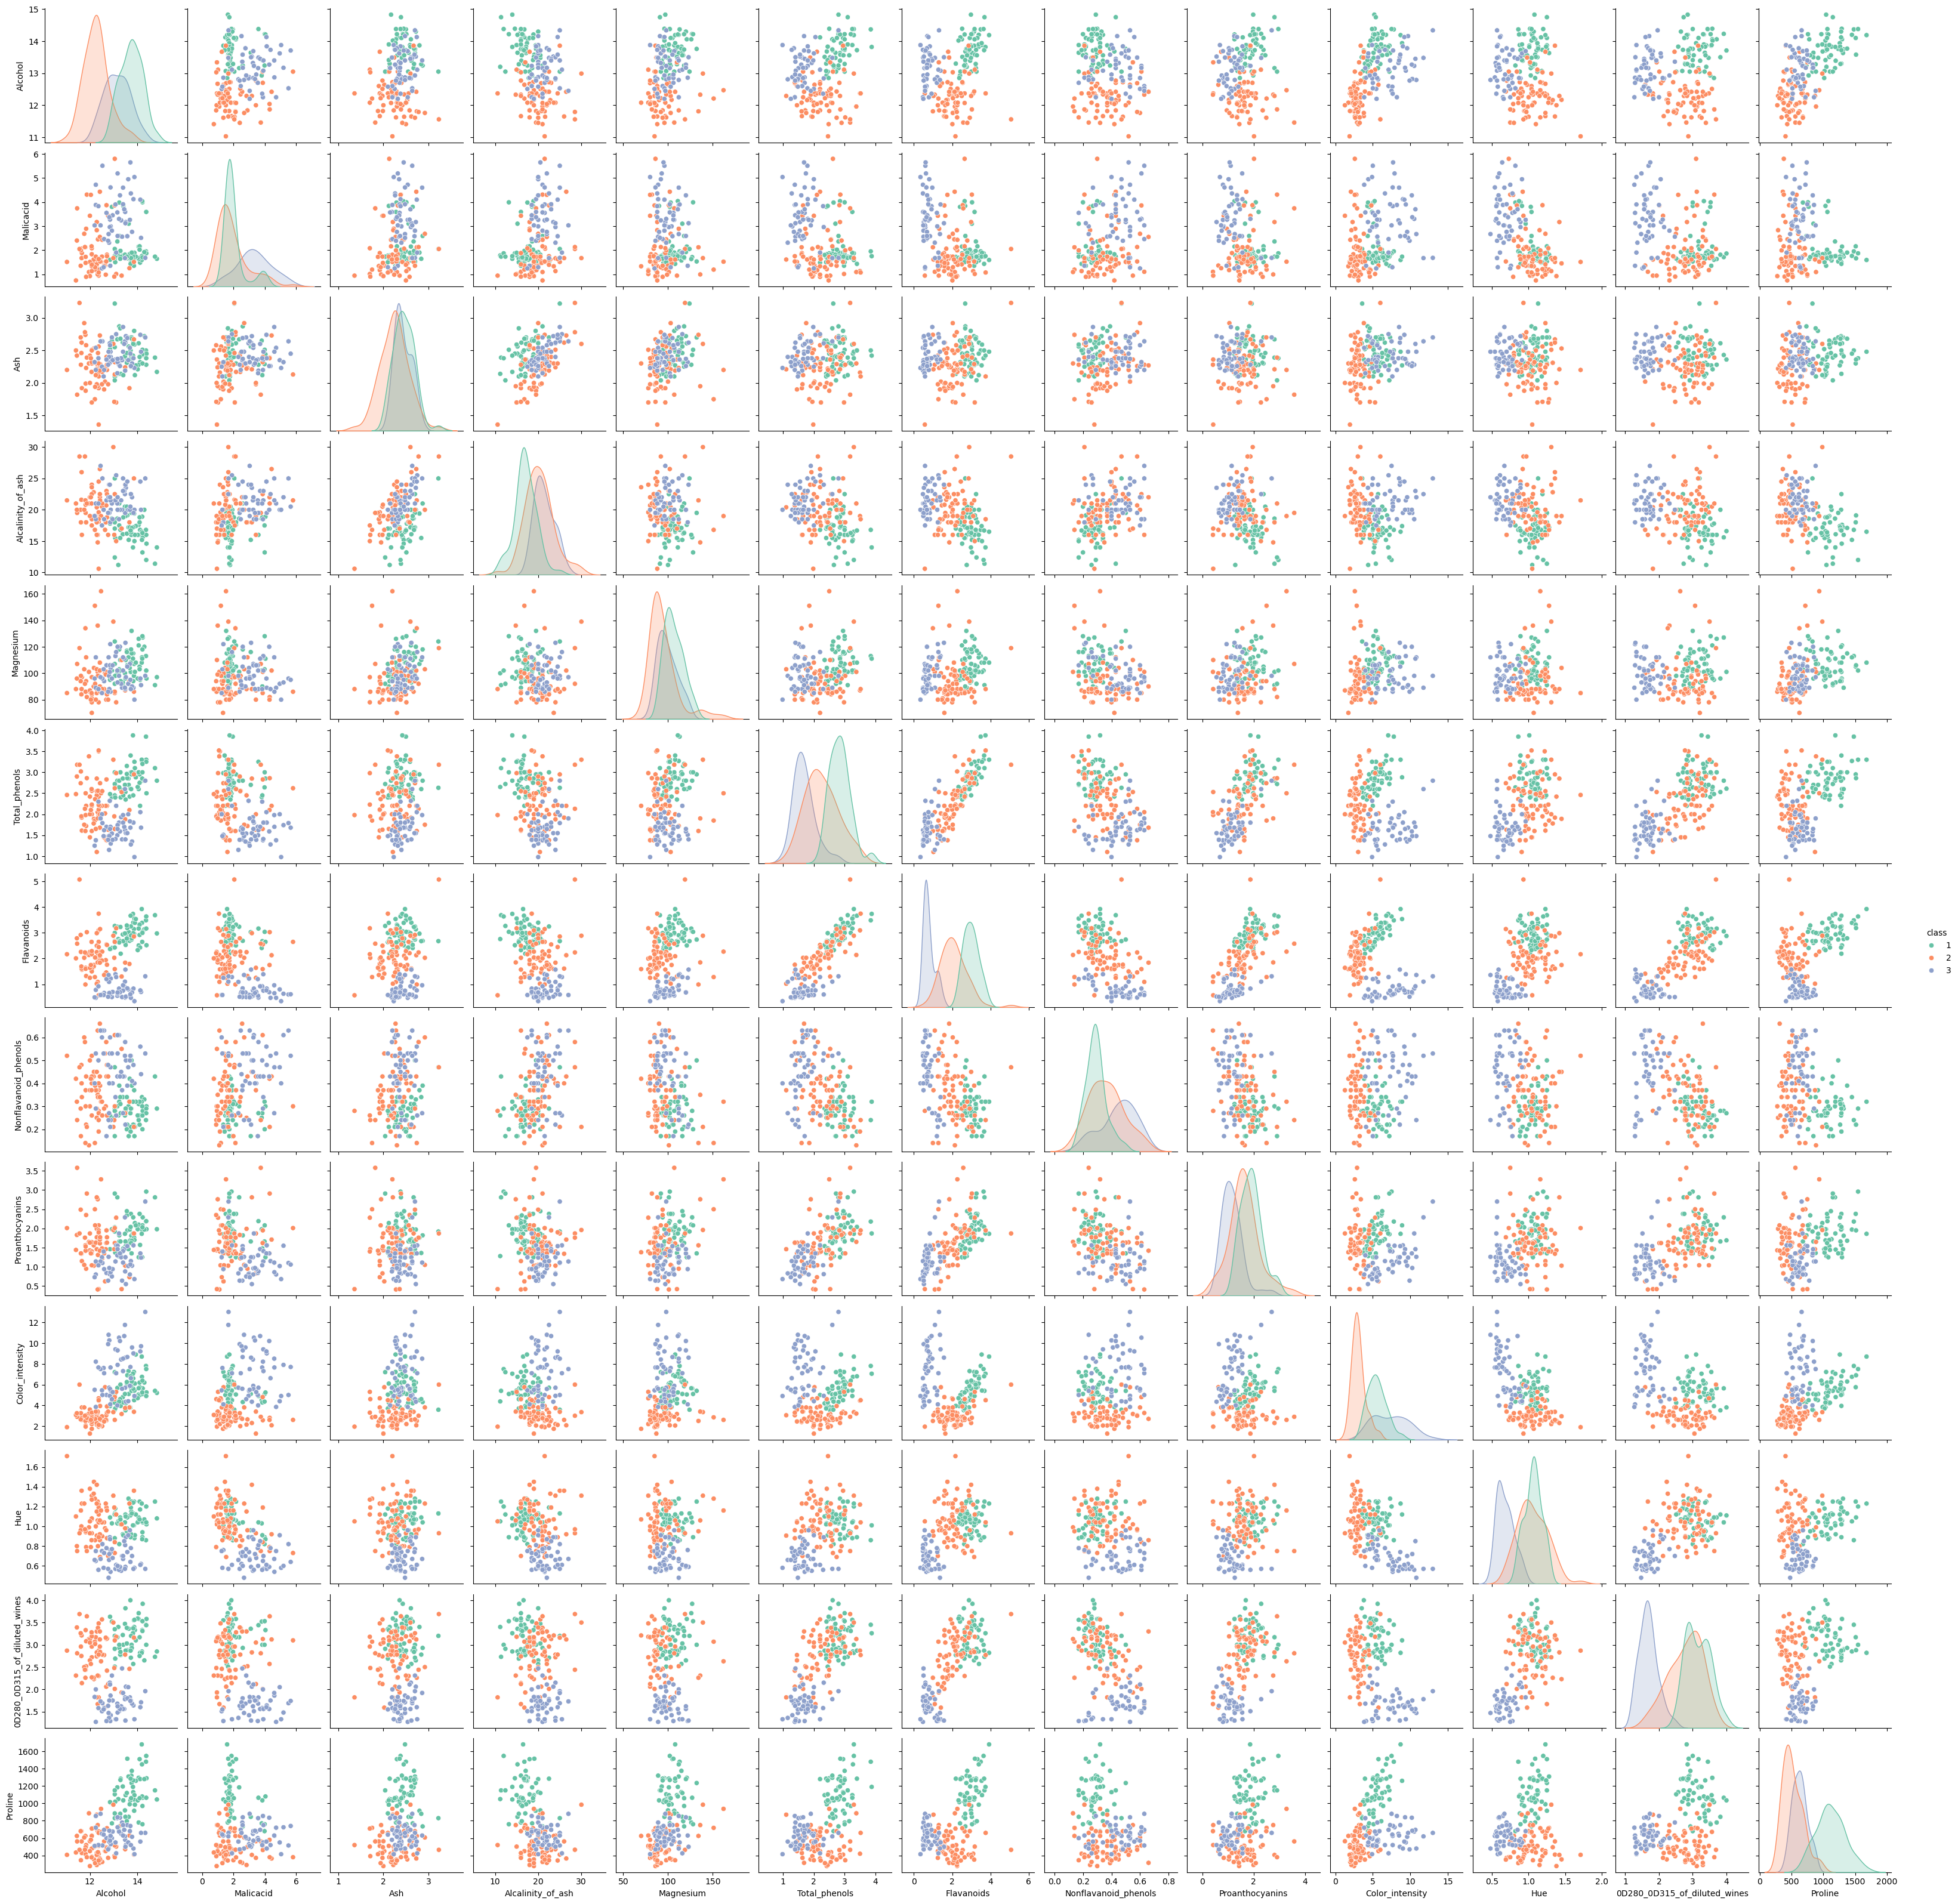

In [70]:
# Make a pairplot of the features and the target
sns.pairplot(original, hue='class', palette='Set2')

<Axes: >

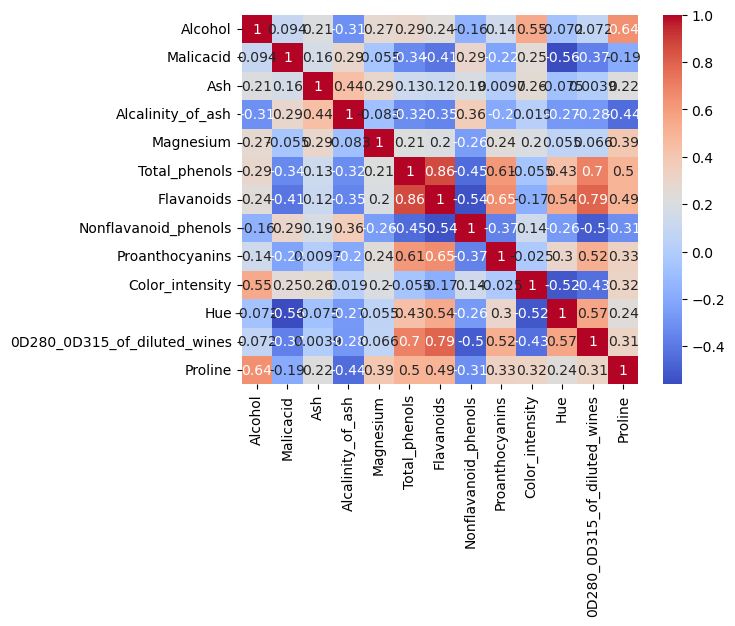

In [71]:
# Make a heatmap of the correlation matrix of the features
corr_matrix = X.corr()
corr_matrix

# plot the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


# plot the histogram of the features
#wine.hist(figsize=(12, 8))


<Axes: >

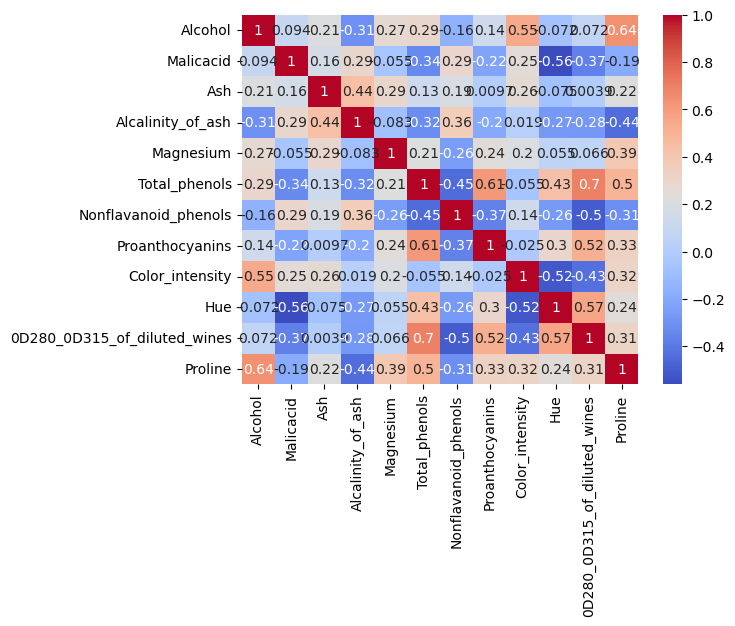

In [73]:
# Drop features that are >80 correlated with each other
X = X.drop(columns=['Flavanoids'])

# campute correlation matrix of X
corr_matrix = X.corr()

# plot the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


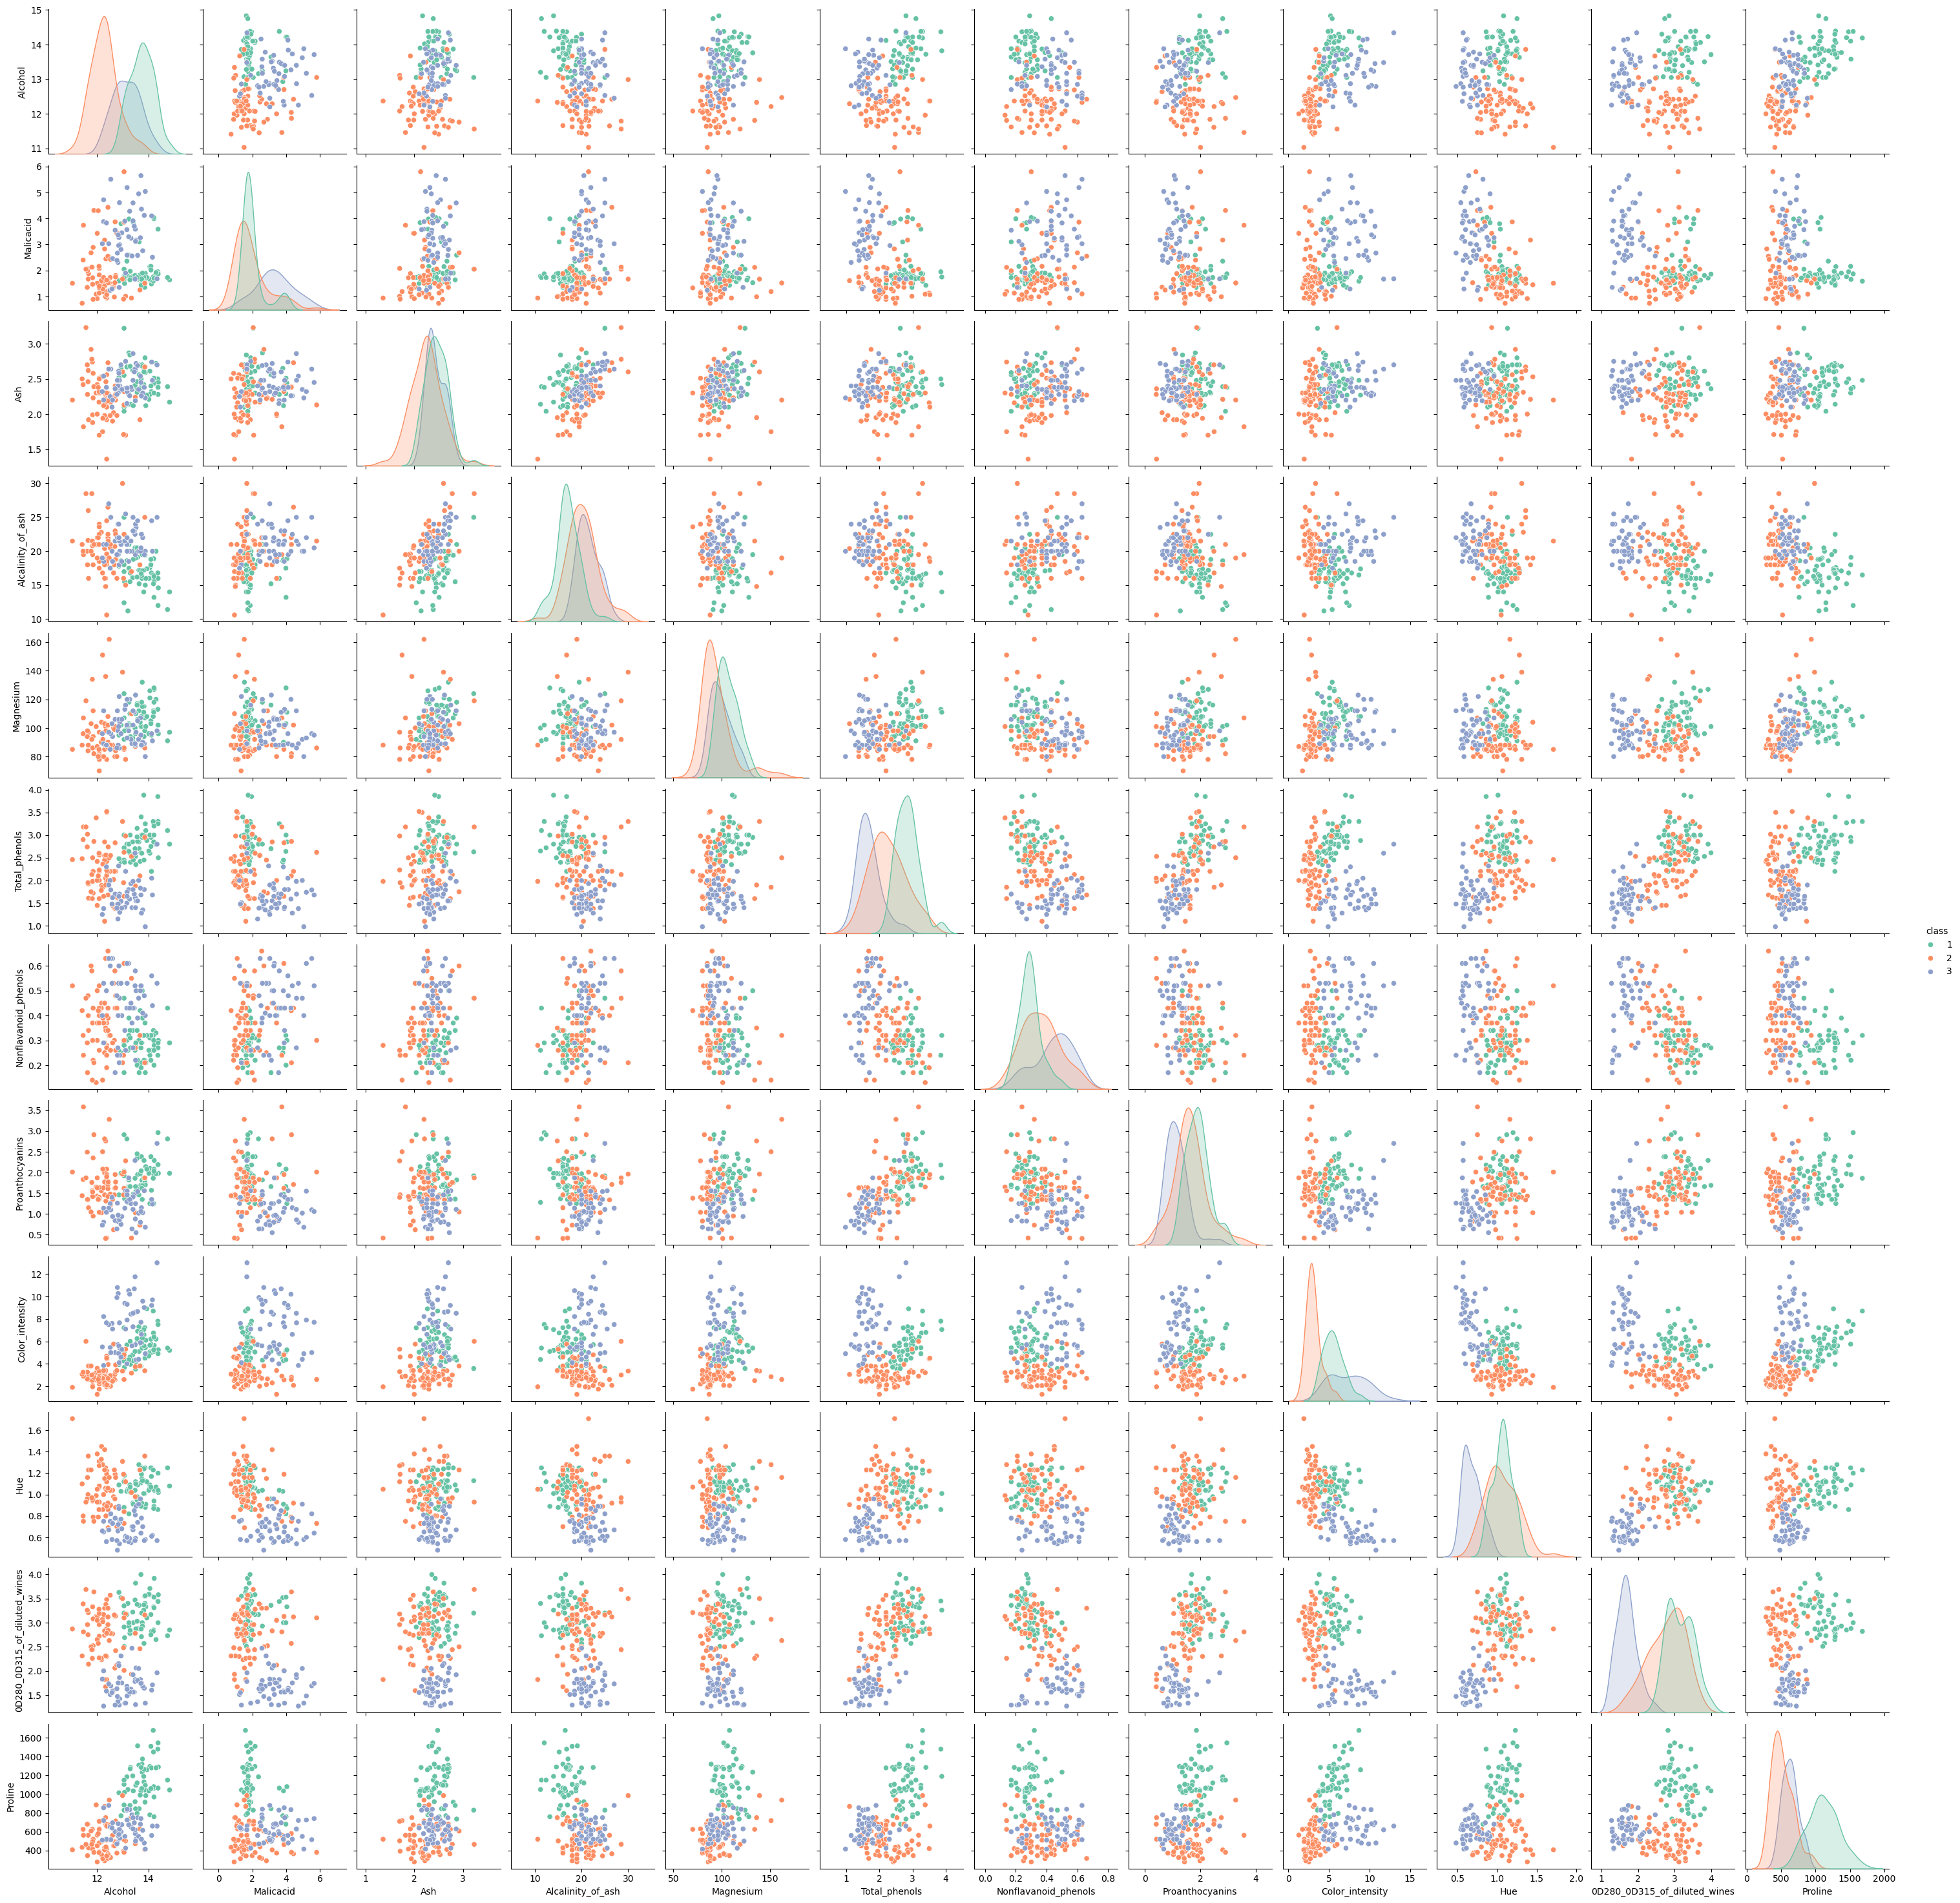

In [78]:
sns.pairplot(pd.concat([X, y], axis=1), hue='class', palette='Set2')

In [154]:
X.columns

Index(['Proline', 'Color_intensity', 'Hue', '0D280_0D315_of_diluted_wines',
       'class'],
      dtype='object')

In [156]:
X

Proline  Color_intensity   Hue  0D280_0D315_of_diluted_wines  class
0       1065             5.64  1.04                          3.92      1
1       1050             4.38  1.05                          3.40      1
2       1185             5.68  1.03                          3.17      1
3       1480             7.80  0.86                          3.45      1
4        735             4.32  1.04                          2.93      1
..       ...              ...   ...                           ...    ...
173      740             7.70  0.64                          1.74      3
174      750             7.30  0.70                          1.56      3
175      835            10.20  0.59                          1.56      3
176      840             9.30  0.60                          1.62      3
177      560             9.20  0.61                          1.60      3

[178 rows x 5 columns]

In [158]:
# Refined using proline, color_intensity, hue, od280/od315_of_diluted_wines features 
X = X.drop(columns=['class'])
display(X)
y = np.ravel(y)
print(X.shape)
print(y.shape)

Proline  Color_intensity   Hue  0D280_0D315_of_diluted_wines
0       1065             5.64  1.04                          3.92
1       1050             4.38  1.05                          3.40
2       1185             5.68  1.03                          3.17
3       1480             7.80  0.86                          3.45
4        735             4.32  1.04                          2.93
..       ...              ...   ...                           ...
173      740             7.70  0.64                          1.74
174      750             7.30  0.70                          1.56
175      835            10.20  0.59                          1.56
176      840             9.30  0.60                          1.62
177      560             9.20  0.61                          1.60

[178 rows x 4 columns]

(178, 4)
(178,)


In [202]:
display(X)
display(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)

display(X_train)
display(y_train)

# Create a pipeline with standard scaling and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic_regression', LogisticRegression(class_weight='balanced'))
])

# Define the parameter grid
param_grid = {
    #'logistic_regression__alpha': [0.01, 0.1, 1, 10]
    'logistic_regression__penalty': ['l2']
}

# Define the scoring metrics
#roc_auc = make_scorer(roc_auc_score,multi_class='ovr')
accuracy = make_scorer(accuracy_score)
precision = make_scorer(precision_score, average='macro')
recall = make_scorer(recall_score, average='macro')
f1 = make_scorer(f1_score, average='macro')

scores = {
    #'roc_auc': roc_auc,
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring=scores, refit='accuracy')

Proline  Color_intensity   Hue  0D280_0D315_of_diluted_wines
0       1065             5.64  1.04                          3.92
1       1050             4.38  1.05                          3.40
2       1185             5.68  1.03                          3.17
3       1480             7.80  0.86                          3.45
4        735             4.32  1.04                          2.93
..       ...              ...   ...                           ...
173      740             7.70  0.64                          1.74
174      750             7.30  0.70                          1.56
175      835            10.20  0.59                          1.56
176      840             9.30  0.60                          1.62
177      560             9.20  0.61                          1.60

[178 rows x 4 columns]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

Proline  Color_intensity   Hue  0D280_0D315_of_diluted_wines
9       1045             7.22  1.01                          3.55
114      385             2.90  0.93                          3.19
18      1680             8.70  1.23                          2.82
66       502             5.30  1.12                          3.18
60       680             3.27  1.25                          1.67
..       ...              ...   ...                           ...
71       410             3.38  1.36                          3.16
106      510             3.40  1.00                          3.17
14      1547             7.50  1.20                          3.00
92       495             3.05  0.96                          2.06
102      438             2.80  0.80                          3.38

[160 rows x 4 columns]

array([1, 2, 1, 2, 2, 3, 3, 3, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1, 3, 3, 2, 3,
       1, 2, 2, 2, 3, 1, 2, 2, 3, 1, 2, 1, 1, 3, 3, 2, 2, 1, 2, 1, 3, 2,
       2, 3, 1, 1, 1, 3, 1, 1, 2, 3, 2, 1, 3, 2, 1, 3, 2, 2, 1, 2, 1, 1,
       2, 1, 1, 3, 2, 2, 2, 1, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 2, 1, 2, 3,
       3, 2, 3, 2, 2, 2, 1, 1, 3, 1, 3, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 3,
       2, 2, 2, 3, 3, 2, 1, 1, 2, 3, 3, 1, 2, 3, 3, 3, 3, 2, 1, 2, 1, 3,
       1, 1, 2, 1, 1, 3, 2, 1, 3, 3, 1, 1, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3,
       1, 2, 2, 1, 2, 2])

In [203]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic_regression',
                                        LogisticRegression(class_weight='balanced'))]),
             param_grid={'logistic_regression__penalty': ['l2']},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score, response_method='predict'),
                      'f1': make_scorer(f1_score, response_method='predict', average=macro),
                      'precision': make_scorer(precision_score, response_method='predict', average=macro),
                      'recall': make_scorer(recall_score, response_method='predict', average=macro)})

In [204]:
# predict the test set with classification report
y_pred = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

# Print the best parameters and the corresponding score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         4

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

Best parameters: {'logistic_regression__penalty': 'l2'}
Best score: 0.93125


In [197]:
pd.DataFrame(grid_search.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.001918      0.000419         0.002066        0.000423   

  param_logistic_regression__penalty                                  params  \
0                                 l2  {'logistic_regression__penalty': 'l2'}   

   split0_test_accuracy  split1_test_accuracy  split2_test_accuracy  \
0                   1.0                   0.5                   1.0   

   split3_test_accuracy  split4_test_accuracy  split5_test_accuracy  \
0                   1.0                   0.5                   1.0   

   split6_test_accuracy  split7_test_accuracy  split8_test_accuracy  \
0                   1.0                   1.0                   1.0   

   split9_test_accuracy  mean_test_accuracy  std_test_accuracy  \
0                   1.0                 0.9                0.2   

   rank_test_accuracy  split0_test_precision  split1_test_precision  \
0                   1                    1.0                   0.25   

   split2_test_precision  split3_test_precision  split4_test_precision  \
0                    1.0                    1.0               0.333333   

   split5_test_precision  split6_test_precision  split7_test_precision  \
0                    1.0                    1.0                    1.0   

   split8_test_precision  split9_test_precision  mean_test_precision  \
0                    1.0                    1.0             0.858333   

   std_test_precision  rank_test_precision  split0_test_recall  \
0            0.283945                    1                 1.0   

   split1_test_recall  split2_test_recall  split3_test_recall  \
0                 0.5                 1.0                 1.0   

   split4_test_recall  split5_test_recall  split6_test_recall  \
0            0.333333                 1.0                 1.0   

   split7_test_recall  split8_test_recall  split9_test_recall  \
0                 1.0                 1.0                 1.0   

   mean_test_recall  std_test_recall  rank_test_recall  split0_test_f1  \
0          0.883333         0.236291                 1             1.0   

   split1_test_f1  split2_test_f1  split3_test_f1  split4_test_f1  \
0        0.333333             1.0             1.0        0.333333   

   split5_test_f1  split6_test_f1  split7_test_f1  split8_test_f1  \
0             1.0             1.0             1.0             1.0   

   split9_test_f1  mean_test_f1  std_test_f1  rank_test_f1  
0             1.0      0.866667     0.266667             1